# Exploratory Work

## Importing Relevant Packages and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from functions import *

SyntaxError: invalid syntax (functions.py, line 74)

In [2]:
choice_95 = pd.DataFrame(pd.read_csv('../data/choice_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('../data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('../data/lo_95.csv'))

choice_100 = pd.DataFrame(pd.read_csv('../data/choice_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('../data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('../data/lo_100.csv'))

choice_150 = pd.DataFrame(pd.read_csv('../data/choice_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('../data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('../data/lo_150.csv'))

In [3]:
datasets = [choice_95, win_95, loss_95, 
          choice_100, win_100, loss_100, 
          choice_150, win_150, loss_150]

for dataset in datasets:
    change_columns_to_int(dataset)

Changing the column names from strings to integers allows for plotting on a graph

## Popularity of each choice throughout

We know that there are certain decks that yield a higher return than others, but the subjects participating in the task do not.

The following code snippets will be exploring the popularity of each choice throughout the game.

In [ ]:
array_95 = create_plottable_array(choice_95)
array_100_pt1 = create_plottable_array(choice_100.iloc[:168])
array_100_pt2 = create_plottable_array(choice_100.iloc[168:336])
array_100_pt3 = create_plottable_array(choice_100.iloc[336:])
array_150 = create_plottable_array(choice_150)

As there were 504 subjects contained in the 'array_100' dataset, they have been split into three groups to allow for clearer analysis of the graphs

In [ ]:
# plot the data points
plt.scatter(
   array_95[:, 0], array_95[:, 1],
   c='blue', alpha=0.03,
   edgecolor='black'
)

In [ ]:
# plot the data points
plt.scatter(
   array_100_pt1[:, 0], array_100_pt1[:, 1],
   c='blue', alpha=0.002,
   edgecolor='black'
)

In [ ]:
# plot the data points
plt.scatter(
   array_100_pt2[:, 0], array_100_pt2[:, 1],
   c='blue', alpha=0.002,
   edgecolor='black'
)

In [ ]:
# plot the data points
plt.scatter(
   array_100_pt3[:, 0], array_100_pt3[:, 1],
   c='blue', alpha=0.002,
   edgecolor='black'
)

In [ ]:
# plot the data points
plt.scatter(
   array_150[:, 0], array_150[:, 1],
   c='blue', alpha=0.005,
   edgecolor='black'
)

The above graphs are very similar, this implies that the popularity of choices is independent of the number of trials the participant played.

Choice 1 seems to be at it's most popular at the beginning of the game, but is much less likely to be chosen as the trials continue.

Choice 2 is very popular at the beginning, but decreases slightly towards the end.

Choice 3 is not very popular at the beginning, but gains some popularity towards the end of the task.

Choice 4 is consistently popular throughout the entire task.

## Viewing the running average of a selected group of subjects

In [ ]:
running_average_95 = create_running_average_array(choice_95, 1)
running_average_100 = create_running_average_array(choice_100, 452)
running_average_150 = create_running_average_array(choice_150, 83)

In [ ]:
plt.scatter(
   running_average_95[:, 0], running_average_95[:, 1],
    s=25, alpha=0.3, c='blue',
    marker='o',
    label='avg_95'
)

plt.scatter(
   running_average_100[:, 0], running_average_100[:, 1],
    s=25, alpha=0.2, c='orange',
    marker='o',
    label='avg_100'
)

plt.scatter(
   running_average_150[:, 0], running_average_150[:, 1],
    s=25, alpha=0.4, c='yellow',
    marker='o',
    label='avg_150'
)

plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

The graphs above are not representative of the entire group of participants, as plotting the choices of 617 people on a chart would not be legible.

The few selected subjects are showing an expected scattered plot at the beginning of the task, with the direction of the plot becoming narrower towards the end.

These figures will not be useful for clustering as the influence of the choice on the running average becomes smaller and smaller and is not hugely representative of their choices towards the end, although it is an interesting observation.

## Analysing Net Profit for Each Round

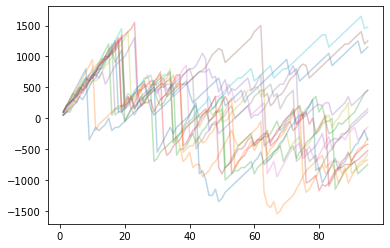

In [21]:
trials_95 = win_95.columns.tolist()
for subject in range(0,len(win_95)):
    net_profits = create_net_profit_loss_list(win_95, loss_95, subject)
    plt.plot(trials_95, net_profits, alpha = 0.3)
plt.show()

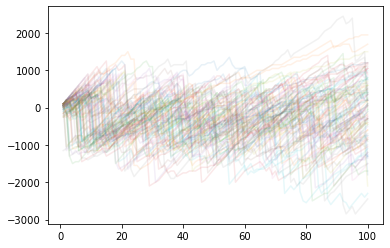

In [19]:
trials_100 = win_100.columns.tolist()
for subject in range(0,len(trials_100)):
    net_profits = create_net_profit_loss_list(win_100, loss_100, subject)
    plt.plot(trials_100, net_profits, alpha=0.1)
plt.show()

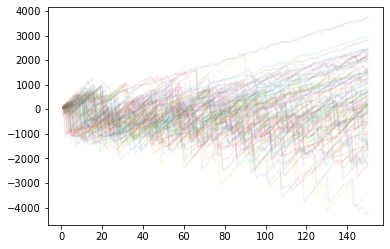

In [23]:
trials_150 = win_150.columns.tolist()
for subject in range(0,len(win_150)):
    net_profits = create_net_profit_loss_list(win_150, loss_150, subject)
    plt.plot(trials_150, net_profits, alpha = 0.1)
plt.show()

It's difficult to draw conclusions from the above diagrams.
There seems to be a slight increase for majority of subjects until around the 10-20 trial mark when it takes a sharp decline. This could be due to the 'bad decks' having quite low penalties at the beginning and gradually getting higher penalties, as outlined in [this paper](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ak/).

For the diagrams shown in the 100-trial and 150-trial datasets, it seems there are an equal distribution of people's net profits/losses around the 0 mark. This shows that not everyone in the trial identified the 'good decks'.
